### FASHION MNIST DATASET

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from collections import Counter
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# split it into training and testing sets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# datatset comes with predefined names
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# shape of test and train sets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)


In [5]:
# finding distinct class number
numOflcasses = len(np.unique(y_train))
print("Number of classes:", numOflcasses)

Number of classes: 10


**DATA PREPROCESSING**

In [6]:
# Reshape the training data and testing data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [7]:
# data augmentation for training set
trainAugmenter = ImageDataGenerator(rescale=1./255,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True)

augmentedTrainingSet = trainAugmenter.flow(X_train, y_train, batch_size=32)

In [8]:
# Create an ImageDataGenerator for preprocessing the test set
testAugmenter = ImageDataGenerator(rescale=1./255)

augmentedTestSet = testAugmenter.flow(X_test, y_test, batch_size=32)

In [9]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)
y_train shape: (60000,)
y_test shape: (10000,)


**VISUALIZATION**

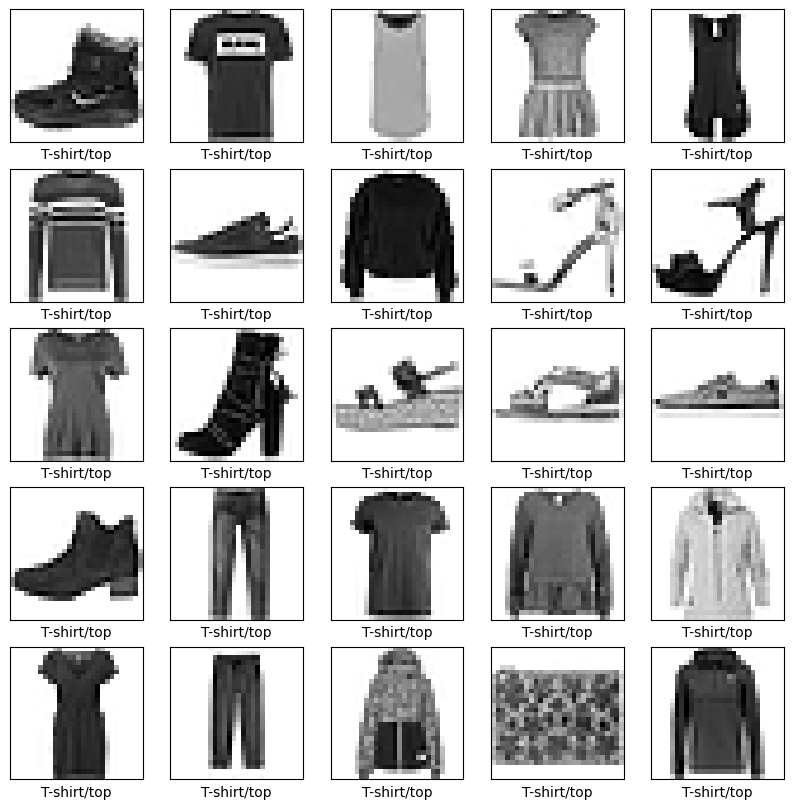

In [10]:
# Display sample images from the dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(classes[np.argmax(y_train[i])])
plt.show()

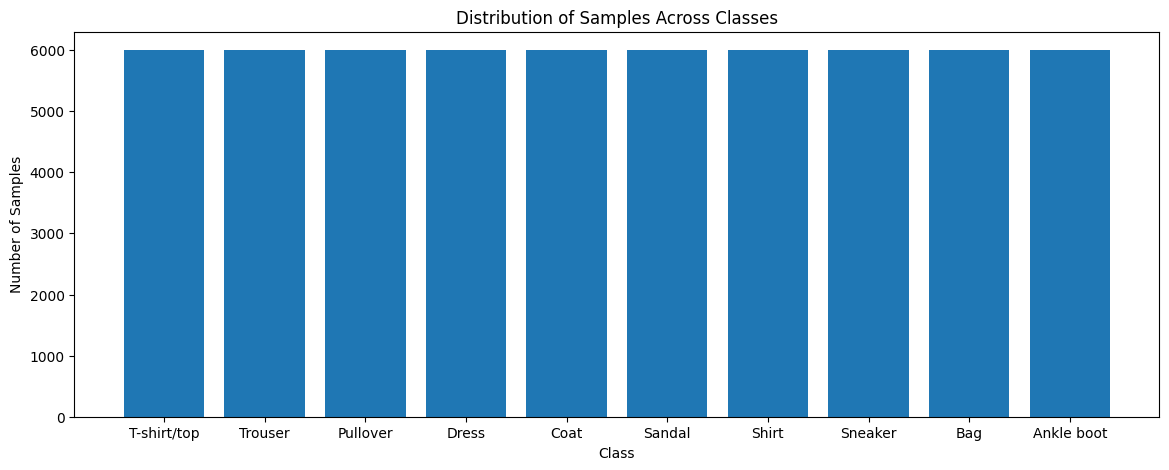

In [11]:
# Bar chart showing the distribution of samples across different classes
plt.figure(figsize=(14, 5))
plt.bar(range(10), np.bincount(y_train), tick_label=classes)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Distribution of Samples Across Classes')
plt.show()

**BUILD ANN MODEL**

In [12]:
model = models.Sequential([
    # Flatten input images to a vector
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # Fully connected layer(1) with 128 units and ReLU activation
     tf.keras.layers.Dense(128, activation='relu'),
    # Fully connected layer(2) with 64 units and ReLU activation
     tf.keras.layers.Dense(64, activation='relu'),
    # Fully connected layer(2) with 32 units and ReLU activation
     tf.keras.layers.Dense(32, activation='relu'),
    # Output layer with 10 units for 10 classes and softmax activation
    tf.keras. layers.Dense(10, activation='softmax')
])

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# Training the model
history = model.fit(augmentedTrainingSet, epochs=30, validation_data=augmentedTestSet)

Epoch 1/30
1875/1875 [==============================] - 46s 23ms/step - loss: 0.6780 - accuracy: 0.7487 - val_loss: 0.5255 - val_accuracy: 0.8052
Epoch 2/30
1875/1875 [==============================] - 29s 15ms/step - loss: 0.5250 - accuracy: 0.8033 - val_loss: 0.4505 - val_accuracy: 0.8321
Epoch 3/30
1875/1875 [==============================] - 30s 16ms/step - loss: 0.4852 - accuracy: 0.8177 - val_loss: 0.4773 - val_accuracy: 0.8170
Epoch 4/30
1875/1875 [==============================] - 27s 15ms/step - loss: 0.4639 - accuracy: 0.8243 - val_loss: 0.4410 - val_accuracy: 0.8343
Epoch 5/30
1875/1875 [==============================] - 30s 16ms/step - loss: 0.4480 - accuracy: 0.8312 - val_loss: 0.4280 - val_accuracy: 0.8381
Epoch 6/30
1875/1875 [==============================] - 27s 14ms/step - loss: 0.4364 - accuracy: 0.8361 - val_loss: 0.4081 - val_accuracy: 0.8441
Epoch 7/30
1875/1875 [==============================] - 27s 14ms/step - loss: 0.4227 - accuracy: 0.8388 - val_loss: 0.3886 -

**5.MODEL EVALUATION**

In [16]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(augmentedTestSet)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

313/313 [==============================] - 1s 4ms/step - loss: 0.3571 - accuracy: 0.8641
Test Loss: 0.3571232259273529
Test Accuracy: 0.8640999794006348


Test Set Prediction:

In [17]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [18]:
model.save("cnn_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Select some random images

1/1 [==============================] - 0s 23ms/step


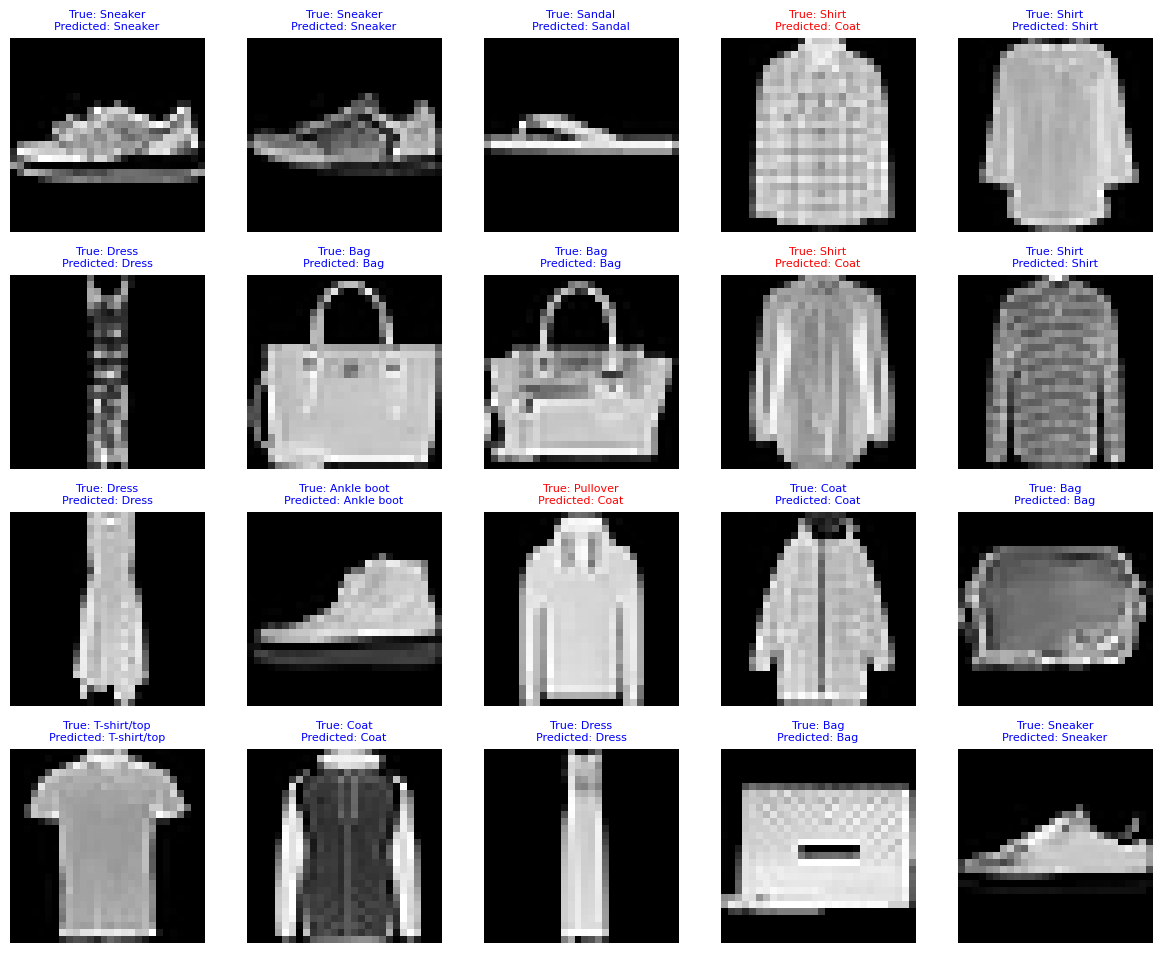

In [19]:
random_images = np.random.randint(0, len(X_test), size=20)
# Preprocess the images and make predictions
plt.figure(figsize=(12, 12))  # Define plot size
for i, random_index in enumerate(random_images):
    random_image = X_test[random_index]
    true_label = y_test[random_index]

    # Preprocess the image
    input_image = np.expand_dims(random_image, axis=0) / 255.0

    # Make prediction
    predicted_label = np.argmax(model.predict(input_image), axis=-1)[0]
    predicted_class = classes[predicted_label]

    plt.subplot(5, 5, i+1)  # 5 rows, 5 columns, i+1 is the subplot number
    plt.imshow(random_image.squeeze(), cmap='gray')
    plt.axis('off')

    # Color based predictions
    font_color = 'blue' if true_label == predicted_label else 'red'

    plt.title(f"True: {classes[true_label]}\nPredicted: {predicted_class}", fontsize=8, color=font_color)

plt.tight_layout()
plt.show()

